In [1]:
import tensorflow as tf

X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset

2025-11-03 18:00:10.663734: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
W0000 00:00:1762203613.413383    5633 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [2]:
# Above is roughly the same as (above items are int32 and this are int64, but the sequence number are the same):
dataset_2 = tf.data.Dataset.range(10)
dataset_2

<_RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

In [3]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


2025-11-03 18:00:13.456513: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [4]:
for item in dataset_2:
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


2025-11-03 18:00:13.467105: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
X_nested = {
    "a": ([1, 2, 3], [4, 5, 6]),
    "b": [7, 8, 9],
}
dataset = tf.data.Dataset.from_tensor_slices(X_nested)
for item in dataset:
    print(item)

{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=4>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=7>}
{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=5>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=8>}
{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=6>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=9>}


# Transformations

In [6]:
# For individual items in each tensor (no batches)
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
dataset = dataset.filter(lambda x: x < 3)
for item in dataset:
    print(item)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


2025-11-03 18:00:13.504950: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [7]:
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10))
dataset = dataset.repeat(3).batch(7)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


In [8]:
dataset = dataset.map(lambda x: x * 2, num_parallel_calls=tf.data.AUTOTUNE)
for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int32)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)
tf.Tensor([16 18], shape=(2,), dtype=int32)


In [9]:
dataset = dataset.filter(lambda x: tf.reduce_sum(x) > 50)
for item in dataset:
    print(item)

tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)


In [10]:
for item in dataset.take(2):
    print(item)

tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)


2025-11-03 18:00:13.584949: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# Shuffling data

In [11]:
dataset = tf.data.Dataset.range(10).repeat(2)
dataset = dataset.shuffle(buffer_size=10, seed=42).batch(7) # Batch before the shuffle will shuffle the entire batch against others (not useful at all).
for item in dataset:
    print(item)

tf.Tensor([5 2 8 1 7 9 2], shape=(7,), dtype=int64)
tf.Tensor([0 0 4 6 9 3 5], shape=(7,), dtype=int64)
tf.Tensor([3 8 4 1 7 6], shape=(6,), dtype=int64)


# Interleaving lines from multiple files

In [12]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


df = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(df.data, df.target.reshape(-1, 1), test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

housing = np.c_[X_train, y_train]
housing = pd.DataFrame(housing)
housing.columns = df.feature_names + df.target_names

housing_test = np.c_[X_test, y_test]
housing_test = pd.DataFrame(housing_test)
housing_test.columns = df.feature_names + df.target_names

housing_valid = np.c_[X_valid, y_valid]
housing_valid = pd.DataFrame(housing_valid)
housing_valid.columns = df.feature_names + df.target_names

In [13]:
housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.7069,27.0,6.523256,1.116279,873.0,3.383721,38.00,-120.97,1.769
1,3.8750,15.0,5.058406,1.075770,3359.0,2.651144,34.10,-117.87,1.733
2,2.8828,26.0,5.290618,1.201373,1273.0,2.913043,33.76,-117.85,2.047
3,5.0000,34.0,6.474708,1.136187,705.0,2.743191,34.35,-119.74,3.294
4,5.0371,25.0,6.385656,1.008119,1857.0,2.512855,38.50,-121.51,1.802
...,...,...,...,...,...,...,...,...,...
13204,3.3427,16.0,3.748996,1.146586,951.0,1.909639,33.79,-118.29,1.542
13205,3.6083,16.0,5.720486,0.980903,2279.0,3.956597,38.04,-121.34,1.464
13206,3.9844,18.0,5.549834,1.014950,1952.0,3.242525,32.74,-116.99,2.153
13207,4.5112,16.0,4.414286,1.011429,730.0,2.085714,33.84,-117.87,1.390


In [14]:
# Separate the dataset into smaller CSVs

import math

def split_dataset_into_multiple_csv(string_type, df, batch_size=1_000):
    batch_size = 1_000
    batches = math.ceil(df.shape[0] / batch_size)
    print(f"Processing {string_type}... Batches = {batches}")
    start = 0
    for index in range(batches):
        batch = index + 1
        end = (batch * batch_size)
        filename = f"datasets/housing/housing_{string_type}_{batch:02d}.csv"
        df[start:end].to_csv(filename, index=False)
        
        start = end

split_dataset_into_multiple_csv("train", housing)
split_dataset_into_multiple_csv("test", housing_test)
split_dataset_into_multiple_csv("valid", housing_valid)

Processing train... Batches = 14
Processing test... Batches = 5
Processing valid... Batches = 4


In [15]:
train_filepaths = [
    "datasets/housing/housing_train_*.csv",
]

valid_filepaths = [
    "datasets/housing/housing_valid_*.csv",
]

test_filepaths = [
    "datasets/housing/housing_valid_*.csv",
]

In [16]:
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)
filepath_dataset

<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [17]:
n_readers = 4 # read 4 files at a time
dataset = filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1), # Skip header
    cycle_length=n_readers
)

In [18]:
count = 0
for item in dataset:
    count += 1
count

13209

In [19]:
for item in dataset:
    print(item)

tf.Tensor(b'8.6001,15.0,7.138702460850112,1.0782997762863535,930.0,2.0805369127516777,33.61,-117.86,5.00001', shape=(), dtype=string)
tf.Tensor(b'4.7069,27.0,6.523255813953488,1.1162790697674418,873.0,3.383720930232558,38.0,-120.97,1.769', shape=(), dtype=string)
tf.Tensor(b'3.6849,33.0,5.529610829103215,1.0846023688663282,1704.0,2.883248730964467,33.79,-117.97,2.114', shape=(), dtype=string)
tf.Tensor(b'2.7708,34.0,4.345549738219895,1.0785340314136125,1678.0,4.392670157068062,34.09,-118.21,1.482', shape=(), dtype=string)
tf.Tensor(b'2.5074,35.0,4.882154882154882,1.0942760942760943,717.0,2.414141414141414,40.42,-120.66,0.664', shape=(), dtype=string)
tf.Tensor(b'3.875,15.0,5.058405682715075,1.0757695343330702,3359.0,2.6511444356748224,34.1,-117.87,1.733', shape=(), dtype=string)
tf.Tensor(b'4.3636,28.0,6.138020833333333,1.0625,1162.0,3.0260416666666665,34.67,-118.22,1.797', shape=(), dtype=string)
tf.Tensor(b'1.2292,36.0,4.833333333333333,1.0555555555555556,285.0,3.1666666666666665,38.

In [20]:
# Preprocess the data
from sklearn.preprocessing import StandardScaler
import numpy as np

# Here is sort of "hardcoded" the mean and standard deviation because we can have the entire dataset in memory
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)


X_mean = standard_scaler.mean_
X_std = standard_scaler.scale_
n_inputs = 8

def parse_csv_line(line):
    defaults = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)] # 8 default 0s plus an empty value (output) = 9 columns
    fields = tf.io.decode_csv(line, record_defaults=defaults) # Array of tensor where each value corresponds to each csv value

    return tf.stack(fields[:-1]), tf.stack(fields[-1:]) # Group in a tensor with array of values

def preprocess(line):
    X, y = parse_csv_line(line)

    return (X - X_mean) / X_std, y

In [21]:
preprocess(b'8.32,41.0,6.91,1.02,3.0,2.5,37.88,-12.23,4.526')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 2.3552804 ,  0.98758775,  0.7029885 , -0.19507624, -1.2521574 ,
        -0.07719775,  1.0465803 , 53.537754  ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([4.526], dtype=float32)>)

In [22]:
# Group every above functions into one
def csv_reader_dataset(filepaths, n_readers=5, 
                       n_read_threads=tf.data.AUTOTUNE, n_parse_threads=tf.data.AUTOTUNE, 
                       shuffle_buffer_size=10_000, seed=42, batch_size=32):
    
    dataset = tf.data.Dataset.list_files(filepaths, seed=seed)
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers, num_parallel_calls=n_read_threads
    )
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    dataset = dataset.shuffle(shuffle_buffer_size, seed=seed)

    return dataset.batch(batch_size).prefetch(1)

In [23]:
train_set = csv_reader_dataset(train_filepaths)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)
# for item in train_set:
#     print(item)

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1),
])
model.compile(loss="mse", optimizer="sgd")
model.fit(train_set, validation_data=valid_set, epochs=5)

Epoch 1/5


/home/julio/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8932 - val_loss: 20.3174
Epoch 2/5


/home/julio/.local/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:164: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 51.5992 - val_loss: 38.5385
Epoch 3/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.6366 - val_loss: 1.0630
Epoch 4/5


2025-11-03 18:00:17.874327: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8344 - val_loss: 0.5828
Epoch 5/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5212 - val_loss: 0.5120


In [25]:
test_mse = model.evaluate(test_set)

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.5120


In [26]:
new_set = test_set.take(3) # Pretend we have 3 new samples. As the dataset is batched, this take the first 3 batches (of 32 items each), so 32x3 = 96
y_pred = model.predict(new_set)
y_pred.shape

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(96, 1)

In [27]:
first_element = []
for item in test_set.take(1):
    first_element = item[0].numpy()[0]

y_pred = model.predict(tf.convert_to_tensor([first_element]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[4.084414]], dtype=float32)

# TFRecord format

In [28]:
with tf.io.TFRecordWriter("datasets/my_data.tfrecord") as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

In [29]:
filepaths = ["datasets/my_data.tfrecord"]
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


2025-11-03 18:00:19.655621: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:390] TFRecordDataset `buffer_size` is unspecified, default to 262144


In [30]:
options = tf.io.TFRecordOptions(compression_type="GZIP")
with tf.io.TFRecordWriter("datasets/my_compressed.tfrecord", options) as f:
    f.write(b"Compress, compress, compress!")

In [31]:
dataset = tf.data.TFRecordDataset(["datasets/my_compressed.tfrecord"], compression_type="GZIP")
for item in dataset:
    print(item)

tf.Tensor(b'Compress, compress, compress!', shape=(), dtype=string)


# Keras preprocessing layers

In [32]:
norm_layer = tf.keras.layers.Normalization()
model = tf.keras.models.Sequential([
    norm_layer,
    tf.keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=2e-3))
norm_layer.adapt(X_train) # computes the mean and variance of every feature
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=5)

Epoch 1/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.0219 - val_loss: 0.9309
Epoch 2/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.6789 - val_loss: 0.6251
Epoch 3/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 0.5779 - val_loss: 0.5938
Epoch 4/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 0.5587 - val_loss: 0.5795
Epoch 5/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 0.5472 - val_loss: 0.5693


## Separating the normalization layer and integrating it in the final model

In [33]:
norm_layer = tf.keras.layers.Normalization()
norm_layer.adapt(X_train)
X_train_scaled = norm_layer(X_train)
X_valid_scaled = norm_layer(X_valid)

In [34]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1)])
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=2e-3))
model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.7706 - val_loss: 0.9805
Epoch 2/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.7108 - val_loss: 0.6459
Epoch 3/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 0.6019 - val_loss: 0.6112
Epoch 4/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.5751 - val_loss: 0.5915
Epoch 5/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.5578 - val_loss: 0.5825


In [35]:
final_model = tf.keras.Sequential([
    norm_layer,
    model
])
X_new = X_test[:3] # Pretend we have a few new instances (unscaled)
y_pred = final_model(X_new) # Preprocesses the data and makes predictions
y_pred

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.85964453],
       [1.6827438 ],
       [2.3701293 ]], dtype=float32)>

# Discretization layer

In [36]:
age = tf.constant([[10.], [93.], [57.], [18.], [37.], [5.]])
discretize_layer = tf.keras.layers.Discretization(bin_boundaries=[18., 50.])
age_categories = discretize_layer(age)
age_categories

<tf.Tensor: shape=(6, 1), dtype=int64, numpy=
array([[0],
       [2],
       [2],
       [1],
       [1],
       [0]])>

In [37]:
onehot_layer = tf.keras.layers.CategoryEncoding(num_tokens=3)
onehot_layer(age_categories)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)>

In [38]:
two_age_categories = np.array([[1, 0], [2, 2], [2, 0]])
onehot_layer(two_age_categories)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 0.],
       [0., 0., 1.],
       [1., 0., 1.]], dtype=float32)>

In [39]:
onehot_layer = tf.keras.layers.CategoryEncoding(num_tokens=3 + 3)
onehot_layer(two_age_categories + [0, 3]) # adds 3 to the second feature, shifting it into the second group

<tf.Tensor: shape=(3, 6), dtype=float32, numpy=
array([[0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0.]], dtype=float32)>

# StringLookup layer

In [40]:
# Basically a hash table
cities = ["Auckland", "Paris", "Paris", "San Francisco"]
str_lookup_layer = tf.keras.layers.StringLookup()
str_lookup_layer.adapt(cities)
str_lookup_layer([["Paris"], ["Auckland"], ["Auckland"], ["Montreal"]])

<tf.Tensor: shape=(4, 1), dtype=int64, numpy=
array([[1],
       [3],
       [3],
       [0]])>

In [41]:
str_lookup_layer = tf.keras.layers.StringLookup(output_mode="one_hot")
str_lookup_layer.adapt(cities)
str_lookup_layer([["Paris"], ["Auckland"], ["Auckland"], ["Montreal"]])

<tf.Tensor: shape=(4, 4), dtype=int64, numpy=
array([[0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0]])>

# Hashing layer (better not to use because of hash collision)

In [42]:
hashing_layer = tf.keras.layers.Hashing(num_bins=10)
hashing_layer([["Paris"], ["Tokyo"], ["Auckland"], ["Montreal"]])

<tf.Tensor: shape=(4, 1), dtype=int64, numpy=
array([[0],
       [1],
       [9],
       [1]])>

# Embeddings

In [43]:
tf.random.set_seed(42)
embedding_layer = tf.keras.layers.Embedding(input_dim=5, output_dim=2)
embedding_layer(np.array([2, 4, 2]))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.04090693,  0.03376359],
       [ 0.03840848, -0.00573029],
       [-0.04090693,  0.03376359]], dtype=float32)>

In [44]:
# Combined with StringLookup layer to embed a categorical text attribute
tf.random.set_seed(42)
ocean_prox = ["<1H OCEAN", "INLAND", "NEAR OCEAN", "NEAR BAY", "ISLAND"]
str_lookup_layer = tf.keras.layers.StringLookup()
str_lookup_layer.adapt(ocean_prox)
lookup_and_embed = tf.keras.Sequential([
    str_lookup_layer,
    tf.keras.layers.Embedding(input_dim=str_lookup_layer.vocabulary_size(), output_dim=5)
])

In [45]:
lookup_and_embed(np.array([["<1H OCEAN"], ["ISLAND"], ["<1H OCEAN"], ["NOT IN VOCABULARY"]]))

<tf.Tensor: shape=(4, 1, 5), dtype=float32, numpy=
array([[[ 0.02586475,  0.0168677 ,  0.03799803, -0.04301886,
          0.0448318 ]],

       [[ 0.03848407, -0.00867128,  0.02782548,  0.02797462,
         -0.02453621]],

       [[ 0.02586475,  0.0168677 ,  0.03799803, -0.04301886,
          0.0448318 ]],

       [[ 0.01219443, -0.03321247,  0.04576593,  0.04683593,
         -0.00586502]]], dtype=float32)>

# Text preprocessing

In [46]:
train_data = ["to be", "!(to be)", "That's the question", "Be, be, be."]
text_vec_layer = tf.keras.layers.TextVectorization()
text_vec_layer.adapt(train_data)
text_vec_layer(["Be good!", "Question: be or be?"])

<tf.Tensor: shape=(2, 4), dtype=int64, numpy=
array([[2, 1, 0, 0],
       [6, 2, 1, 2]])>

In [47]:
text_vec_layer = tf.keras.layers.TextVectorization(output_mode="tf_idf")
text_vec_layer.adapt(train_data)
text_vec_layer(["Be good!", "Question: be or be?"])

<tf.Tensor: shape=(2, 6), dtype=float32, numpy=
array([[0.96725637, 0.6931472 , 0.        , 0.        , 0.        ,
        0.        ],
       [0.96725637, 1.3862944 , 0.        , 0.        , 0.        ,
        1.0986123 ]], dtype=float32)>

# Image preprocessing layers

In [48]:
from sklearn.datasets import load_sample_images

images = load_sample_images()["images"]
crop_image_layer = tf.keras.layers.CenterCrop(height=100, width=100)
cropped_images = crop_image_layer(images)

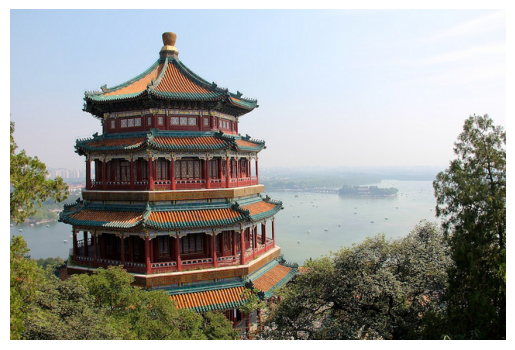

In [49]:
import matplotlib.pyplot as plt

plt.imshow(images[0] / 255.0)
plt.axis("off")
plt.show()

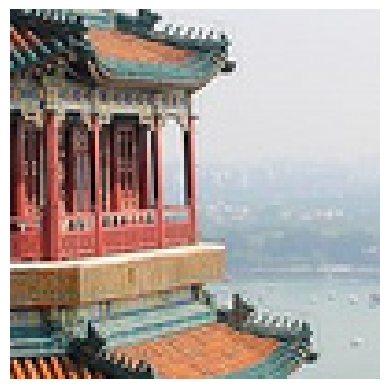

In [50]:
plt.imshow(cropped_images[0] / 255.0)
plt.axis("off")
plt.show()

# Exercises

1. Why would you want to use the tf.data API?<br>
R. To manipulate data for efficiently, which includes load, transform and write datasets. Also, it offers much more functionalities, like preprocess data, load multiple files in parallel, etc.
2. What are the benefits of splitting a large dataset into multiple files?<br>
R. Being able to do offline training when dataset could not fit in memory and also being able to load them in parallel and interleaving.
3. During training, how can you tell that your input pipeline is the bottleneck? What can you do to fix it?<br>
R. 
4. Can you save any binary data to a TFRecord file, or only serialized protocol buffers?<br>
R. Any data, but the preference to use protocol buffers is the standardization.
5. Why would you go through the hassle of converting all your data to the Example protobuf format? Why not use your own protobuf definition?<br>
R. The only reason would be standardization.
6. When using TFRecords, when would you want to activate compression? Why not do it systematically?<br>
R. It's recommended if the data need to feed in or out a network; as the filesize is reduced, would be faster, but at the increasing overhead of compress/decompress the data.
7. Data can be preprocessed directly when writing the data files, or within the tf.data pipeline, or in preprocessing layers within your model. Can you list a few pros and cons of each option?<br>
R. 
8. Name a few common ways you can encode categorical integer features. What about text?<br>
R. With IntegerLookup layer to make onehot encoders. For text, TextVectorization.

## 9

In [51]:
# Get the fashion mnist data

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [52]:
def create_dataset(features, label, buffer_size=128, seed=42, batch_size=16):
    norm_layer = tf.keras.layers.Normalization()
    norm_layer.adapt(features)
    
    dataset = tf.data.Dataset.from_tensor_slices((features, label))
    dataset = dataset.map(lambda X, y: (norm_layer(X), y))
    dataset = dataset.shuffle(buffer_size=buffer_size, seed=seed)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(1)
    
    return dataset

train_set = create_dataset(X_train, y_train)
test_set = create_dataset(X_test, y_test)
valid_set = create_dataset(X_valid, y_valid)

In [53]:
def create_example(image_bytes, label):
    feature = {
        'image_raw': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image_bytes])),
        'label': tf.train.Feature(int64_list=tf.train.Int64List(value=[label])),
    }
    
    return tf.train.Example(features=tf.train.Features(feature=feature))

def create_tfrecords(dataset, filename_base):
    i = 0
    for (features, labels) in dataset:
        with tf.io.TFRecordWriter(f"datasets/fashion_tfrecords/{filename_base}/{filename_base}_{i}.tfrecord") as f:
            for feature, label in zip(features, labels):
                f.write(create_example(tf.io.serialize_tensor(feature).numpy(), label).SerializeToString())
    
        i += 1

# NOTE: uncomment to create tfrecord files. Commented just for space
# create_tfrecords(train_set, "train")
# create_tfrecords(test_set, "test")
# create_tfrecords(valid_set, "valid")

In [54]:
feature_description = {
    "image_raw": tf.io.VarLenFeature(tf.string),
    "label": tf.io.FixedLenFeature([], tf.int64, default_value=0),
}

def parse(serialized_example):
    return tf.io.parse_single_example(serialized_example, feature_description)

# dataset = tf.data.TFRecordDataset(["datasets/fashion_tfrecords/train/train_0.tfrecord"]).map(parse)
# for item in dataset:
#     print(item)

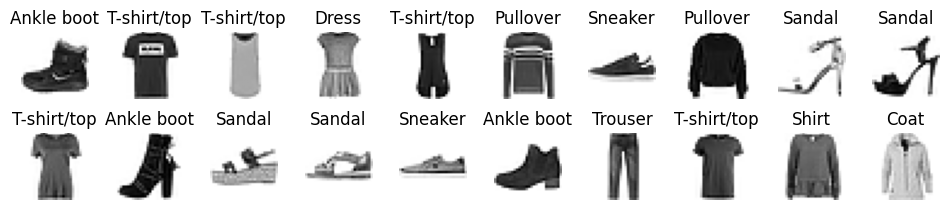

In [55]:
import matplotlib.pyplot as plt

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

def plot_fashion(data, labels):
    nrows = 4
    ncols = 10
    plt.figure(figsize=(ncols * 1.2, nrows * 1.2))

    data = data.reshape(-1, 28, 28)
    for index, (image, label_index) in enumerate(zip(data, labels)):
        label = class_names[label_index]
        plt.subplot(nrows, ncols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.title(label)
        plt.axis("off")

    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()

plot_fashion(X_train[:20], y_train[:20])

In [56]:
train_set.element_spec

(TensorSpec(shape=(None, 1, 28, 28), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.uint8, name=None))

In [57]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[1, 28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])
# model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=2e-3))
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=15)

Epoch 1/15
   1/3438 ━━━━━━━━━━━━━━━━━━━━ 10:03 176ms/step - accuracy: 0.3750 - loss: 2.2089

/home/julio/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3438/3438 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8288 - loss: 0.4774 - val_accuracy: 0.8574 - val_loss: 0.3925
Epoch 2/15
3438/3438 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8745 - loss: 0.3472 - val_accuracy: 0.8774 - val_loss: 0.3403
Epoch 3/15
3438/3438 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8877 - loss: 0.3068 - val_accuracy: 0.8782 - val_loss: 0.3311
Epoch 4/15
3438/3438 ━━━━━━━━━━━━━━━━━━━━ 2s 558us/step - accuracy: 0.8978 - loss: 0.2788 - val_accuracy: 0.8658 - val_loss: 0.3510
Epoch 5/15
3438/3438 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9068 - loss: 0.2560 - val_accuracy: 0.8812 - val_loss: 0.3251
Epoch 6/15
3438/3438 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9143 - loss: 0.2369 - val_accuracy: 0.8882 - val_loss: 0.3137
Epoch 7/15
3438/3438 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9207 - loss: 0.2202 - val_accuracy: 0.8834 - val_loss: 0.3168
Epoch 8/15
3438/3438 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9258 - loss: 0.2054 - val_accur

In [58]:
test_loss, test_accuracy = model.evaluate(test_set)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - accuracy: 0.8749 - loss: 0.3974


## 10

In [59]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

base_path = "datasets/aclImdb/"

def download_imdb_data():
    if not Path(base_path).is_dir():
        tarball_path = "datasets/aclImdb_v1.tar.gz"
        
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
        urllib.request.urlretrieve(url, tarball_path)
        
        with tarfile.open(tarball_path) as tarball:
            tarball.extractall(path="datasets")

download_imdb_data()

In [60]:
# Get and split (for test/valid) the filepaths

train_pos_filepaths = [
    base_path + "train/pos/*.txt",
]
train_neg_filepaths = [
    base_path + "train/neg/*.txt",
]

test_pos_filepaths_full = [
    base_path + "test/pos/*.txt",
]
test_neg_filepaths_full = [
    base_path + "test/neg/*.txt",
]

filepath_dataset_test_pos = []
filepath_dataset_test_neg = []
filepath_dataset_valid_pos = []
filepath_dataset_valid_neg = []

filepath_dataset_train_pos = tf.data.Dataset.list_files(train_pos_filepaths, seed=42)
filepath_dataset_train_neg = tf.data.Dataset.list_files(train_neg_filepaths, seed=42)

filepath_dataset_train_pos_full = tf.data.Dataset.list_files(test_pos_filepaths_full, seed=42)
for (index, item) in enumerate(filepath_dataset_train_pos_full):
    if index < 7500:
        filepath_dataset_valid_pos.append(item)
    else:
        filepath_dataset_test_pos.append(item)

filepath_dataset_train_neg_full = tf.data.Dataset.list_files(test_neg_filepaths_full, seed=42)
for (index, item) in enumerate(filepath_dataset_train_neg_full):
    if index < 7500:
        filepath_dataset_valid_neg.append(item)
    else:
        filepath_dataset_test_neg.append(item)

filepath_dataset_test_pos = tf.data.Dataset.list_files(filepath_dataset_test_pos, seed=42)
filepath_dataset_test_neg = tf.data.Dataset.list_files(filepath_dataset_test_neg, seed=42)
filepath_dataset_valid_pos = tf.data.Dataset.list_files(filepath_dataset_valid_pos, seed=42)
filepath_dataset_valid_neg = tf.data.Dataset.list_files(filepath_dataset_valid_neg, seed=42)

In [77]:
def dataset_reader(dataset, is_positive_review, n_parse_threads=tf.data.AUTOTUNE):

    # preprocess_function = preprocess_positive if is_positive_review == 1 else preprocess_negative
    
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath)
    )
    dataset = dataset.map(lambda review: (review, is_positive_review), 
                          num_parallel_calls=n_parse_threads)

    return dataset
    # dataset = dataset.shuffle(shuffle_buffer_size, seed=seed)

    # return dataset.batch(batch_size).prefetch(1)



train_pos_dataset = dataset_reader(filepath_dataset_train_pos, 1)
train_neg_dataset = dataset_reader(filepath_dataset_train_neg, 0)

test_pos_dataset = dataset_reader(filepath_dataset_test_pos, 1)
test_neg_dataset = dataset_reader(filepath_dataset_test_neg, 0)

valid_pos_dataset = dataset_reader(filepath_dataset_valid_pos, 1)
valid_neg_dataset = dataset_reader(filepath_dataset_valid_neg, 0)

batch_size = 32

train_set = train_pos_dataset.concatenate(train_neg_dataset).shuffle(25_000, seed=42).batch(batch_size).prefetch(1)
test_set = test_pos_dataset.concatenate(test_neg_dataset).batch(batch_size).prefetch(1)
valid_set = valid_pos_dataset.concatenate(valid_neg_dataset).batch(batch_size).prefetch(1)

In [78]:
train_set_reviews = train_set.map(lambda review, label: review, 
                                   num_parallel_calls=tf.data.AUTOTUNE)

text_vec = tf.keras.layers.TextVectorization(max_tokens=1000, output_mode="tf_idf")
text_vec.adapt(train_set_reviews)
text_vec

2025-11-03 18:22:36.418083: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:225771: Filling up shuffle buffer (this may take a while): 12092 of 25000
2025-11-03 18:22:49.434487: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
2025-11-03 18:22:58.281404: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<TextVectorization name=text_vectorization_5, built=False>

In [79]:
text_vec.get_vocabulary()[:10]

['[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i']

In [83]:
text_vec.vocabulary_size()

1000

In [80]:
train_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [81]:
model = tf.keras.Sequential([
    text_vec,
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])
model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=5)

Epoch 1/5


2025-11-03 18:23:08.930630: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:225771: Filling up shuffle buffer (this may take a while): 9880 of 25000


     52/Unknown 26s 3ms/step - accuracy: 0.5939 - loss: 1.1973

2025-11-03 18:23:24.552088: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


782/782 ━━━━━━━━━━━━━━━━━━━━ 119s 118ms/step - accuracy: 0.8254 - loss: 0.4297 - val_accuracy: 0.8146 - val_loss: 0.5152
Epoch 2/5


2025-11-03 18:25:07.055277: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:225771: Filling up shuffle buffer (this may take a while): 12507 of 25000


 57/782 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8622 - loss: 0.3331

2025-11-03 18:25:19.427512: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.8525 - loss: 0.3651 - val_accuracy: 0.8464 - val_loss: 0.3719
Epoch 3/5


2025-11-03 18:25:44.065191: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:225771: Filling up shuffle buffer (this may take a while): 10106 of 25000


 58/782 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8729 - loss: 0.2969

2025-11-03 18:25:56.480135: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.8674 - loss: 0.3251 - val_accuracy: 0.8451 - val_loss: 0.3740
Epoch 4/5


2025-11-03 18:26:23.522622: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:225771: Filling up shuffle buffer (this may take a while): 9963 of 25000
2025-11-03 18:26:33.522344: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:225771: Filling up shuffle buffer (this may take a while): 22500 of 25000


 60/782 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9054 - loss: 0.2497

2025-11-03 18:26:35.981970: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.8912 - loss: 0.2701 - val_accuracy: 0.8497 - val_loss: 0.3686
Epoch 5/5


2025-11-03 18:27:03.114420: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:225771: Filling up shuffle buffer (this may take a while): 12192 of 25000


 60/782 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9261 - loss: 0.2024

2025-11-03 18:27:17.927753: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9154 - loss: 0.2120 - val_accuracy: 0.8503 - val_loss: 0.3864


In [82]:
test_loss, test_accuracy = model.evaluate(test_set)

313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 202ms/step - accuracy: 0.8524 - loss: 0.3741


In [108]:
text_vec([["the"]])

<tf.Tensor: shape=(1, 1000), dtype=float32, numpy=
array([[0.        , 0.69735354, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.       

In [106]:
text_vectorization = tf.keras.layers.TextVectorization(max_tokens=1000, output_mode="int")
text_vectorization.adapt(train_set_reviews)
text_vectorization

2025-11-03 21:28:48.702320: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:225771: Filling up shuffle buffer (this may take a while): 9856 of 25000
2025-11-03 21:29:03.800516: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


<TextVectorization name=text_vectorization_6, built=False>

In [109]:
text_vectorization([["the"]])

<tf.Tensor: shape=(1, 1), dtype=int64, numpy=array([[2]])>

In [112]:
text_vectorization.vocabulary_size()

1000

In [113]:
# Adding an embedding

model = tf.keras.Sequential([
    text_vectorization,
    tf.keras.layers.Embedding(input_dim=text_vectorization.vocabulary_size(), output_dim=20),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])
model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=5)

Epoch 1/5


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, None, 1)

In [114]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_6            │ (None, None)           │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_11 (Embedding)        │ (None, None, 20)       │        20,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, None, 100)      │         2,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, None, 1)        │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,201 (86.72 KB)

 Trainable params: 22,201 (86.72 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
import tensorflow_datasets as tfds

imdb_reviews = tfds.load("imdb_reviews")

/home/julio/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dl Completed...: 0 url [00:00, ? url/s]
Generating splits...:   0%|                                                                                                          | 0/3 [00:00<?, ? splits/s]
Generating train examples...: 0 examples [00:00, ? examples/s]
Generating train examples...: 1 examples [00:01,  1.05s/ examples]
Generating train examples...: 14384 examples [00:02, 8288.61 examples/s]
                                                                        
Shuffling /home/julio/tensorflow_datasets/imdb_reviews/plain_text/incomplete.XWQBE2_1.0.0/imdb_reviews-train.tfrecord*...:   0%| | 0/25000 [00:00<?, ? examples/
Generating splits...:  33%|████████████████████████████████▋                                                                 | 1/3 [00:04<00:08,  4.47s/ splits]
Generating test examples...: 0 examples [00:00, ? examples/s]
Generating test examples...: 9450 examples [00:01, 9448.21 examples/s]
Generating test examples...: 23951 examples [00:02, 12419.91 example

Dataset imdb_reviews downloaded and prepared to /home/julio/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [99]:
imdb_train_set = imdb_reviews["train"]
imdb_test_set = imdb_reviews["test"]

In [102]:
for item in imdb_train_set.take(1):
    print(item["text"])
    print(item["label"])

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


2025-11-03 21:22:55.996131: W tensorflow/core/kernels/data/cache_dataset_ops.cc:917] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
